In [2]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, 'Data')
# print(data_dir)

In [4]:
# read the model info, including the model name, the number of parameters, and the number of MACs
# read the model training info, including the training time, each layer's training time, the epoch time and the epoch energy data
data_model_dir = os.path.join(data_dir, 'model_info')
# read all the model info csv files
model_info_files = os.listdir(data_model_dir)
cifar100_dataset = pd.read_csv(os.path.join(data_model_dir, 'cifar100_datasetinfo.csv'))
fashionmnist_modelinfo = pd.read_csv(os.path.join(data_model_dir, 'fashionmnist_datasetinfo.csv'))

In [5]:
# change the ResNet50 model name to ResNet_test
fashionmnist_modelinfo['Model'] = fashionmnist_modelinfo['Model'].str.replace('ResNet50', 'ResNet_test')
cifar100_dataset['Model'] = cifar100_dataset['Model'].str.replace('ResNet50', 'ResNet_test')

In [6]:
# fashionmnist_modelinfo

### consider only the MACs

In [7]:
# seperate the vgg model data and ResNet_test model data with the original data
test1_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('ResNet_test')]
test2_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('VGG')]
test3_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('GoogleNet_mod3')]
test4_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('GoogleNet_mod7')]
test5_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('GoogleNet_mod11')]
# concatenate the data
test_f = pd.concat([test1_f, test2_f, test3_f, test4_f, test5_f])
test_f

,Model,MACs,Parameters,TotalEnergyPerEpoch,AverageEnergyPerSec,TotalTime,AverageTimeperEpoch,Total Time to Device,Average Time to Device,Total Forward Time,Average Forward Time,Total Backward Time,Average Backward Time,Total Test Time,Average Test Time
6,ResNet_test,2.320000e+09,13870000.0,14077.76,256.90,1087.51,54.38,47.15,2.36,285.08,14.25,595.25,29.76,71.50,3.57
1,VGG11,7.580000e+09,128810000.0,27264.35,324.59,1667.45,83.37,47.60,2.38,477.64,23.88,939.96,47.00,110.53,5.53
2,VGG13,1.130000e+10,128990000.0,43858.97,350.60,2494.23,124.71,47.43,2.37,732.13,36.61,1468.48,73.42,152.73,7.64
3,VGG16,1.546000e+10,134300000.0,54043.96,360.06,2987.17,149.36,47.13,2.36,890.96,44.55,1778.02,88.90,179.09,8.95
11,GoogleNet_mod3,2.740000e+09,11710000.0,14497.42,289.67,993.21,49.66,58.48,2.92,240.75,12.04,524.69,26.23,72.91,3.65
15,GoogleNet_mod7,7.782400e+08,2790000.0,7291.01,260.39,549.10,27.46,48.52,2.43,126.08,6.30,238.34,11.92,52.26,2.61
19,GoogleNet_mod11,8.375600e+08,2100000.0,6546.48,233.81,551.85,27.59,45.21,2.26,123.27,6.16,244.83,12.24,53.48,2.67


In [8]:
# seperate the vgg model data and ResNet_test model data with the original data
test1_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('ResNet_test')]
test2_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('VGG')]
test3_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('GoogleNet_mod3')]
test4_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('GoogleNet_mod7')]
test5_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('GoogleNet_mod11')]
# concatenate the data
test_c = pd.concat([test1_c, test2_c, test3_c, test4_c, test5_c])
test_c

,Model,MACs,Parameters,TotalEnergyPerEpoch,AverageEnergyPerSec,TotalTime,AverageTimeperEpoch,Total Time to Device,Average Time to Device,Total Forward Time,Average Forward Time,Total Backward Time,Average Backward Time,Total Test Time,Average Test Time
6,ResNet_test,2.400000e+09,13920000.0,12656.49,222.06,1132.80,56.64,113.35,5.67,240.22,12.01,504.82,25.24,111.23,5.56
1,VGG11,7.640000e+09,129180000.0,23860.35,294.21,1618.57,80.93,114.94,5.75,398.29,19.91,784.64,39.23,149.39,7.47
2,VGG13,1.135000e+10,129360000.0,37894.64,326.68,2317.64,115.88,117.14,5.86,610.64,30.53,1224.06,61.20,191.93,9.60
3,VGG16,1.552000e+10,134670000.0,46992.02,340.52,2749.50,137.48,115.99,5.80,741.62,37.08,1505.22,75.26,216.65,10.83
11,GoogleNet_mod3,2.820000e+09,11820000.0,13105.00,244.57,1064.14,53.21,130.09,6.50,202.78,10.14,446.12,22.31,112.87,5.64
15,GoogleNet_mod7,8.570100e+08,2900000.0,7203.88,204.42,695.91,34.80,117.14,5.86,108.34,5.42,207.32,10.37,102.62,5.13
19,GoogleNet_mod11,9.162700e+08,2140000.0,6423.14,180.55,704.25,35.21,113.72,5.69,106.51,5.33,213.37,10.67,91.70,4.59


In [9]:
train_f = fashionmnist_modelinfo.drop(test_f.index)
train_c = cifar100_dataset.drop(test_c.index)

In [10]:
# find out the MACs of each model
macs_train_f = train_f['MACs'].values.reshape(-1, 1)
macs_test_f = test_f['MACs'].values.reshape(-1, 1)
macs_train_c = train_c['MACs'].values.reshape(-1, 1)
macs_test_c = test_c['MACs'].values.reshape(-1, 1)
# find out the energy of each model
energy_train_f = train_f['TotalEnergyPerEpoch'].values.reshape(-1, 1)
energy_test_f = test_f['TotalEnergyPerEpoch'].values.reshape(-1, 1)
energy_train_c = train_c['TotalEnergyPerEpoch'].values.reshape(-1, 1)
energy_test_c = test_c['TotalEnergyPerEpoch'].values.reshape(-1, 1)

# print(macs_train_f,'\n','*'*50,'\n',macs_test_f)
# print('*'*50)
# print(energy_train_f, '\n','*'*50,'\n', energy_test_f)

In [11]:
model1_f = LinearRegression()
model1_f.fit(macs_train_f, energy_train_f)
predict1_f = model1_f.predict(macs_test_f)
r2_f = model1_f.score(macs_test_f, energy_test_f)

print(f'The predict values are: {predict1_f}')
print('*'*50)
print(f'The actual values are: {energy_test_f}')
print('*'*50)
print(f'The R2 score is: {r2_f}')

The predict values are: [[12836.14270333]
 [36111.29358022]
 [52572.04667185]
 [70979.77055928]
 [14694.61482658]
 [ 6013.9570349 ]
 [ 6276.44409764]]
**************************************************
The actual values are: [[14077.76]
 [27264.35]
 [43858.97]
 [54043.96]
 [14497.42]
 [ 7291.01]
 [ 6546.48]]
**************************************************
The R2 score is: 0.7864200727589014


In [12]:
model1_c = LinearRegression()
model1_c.fit(macs_train_c, energy_train_c)
predict1_c = model1_c.predict(macs_test_c)
r2_c = model1_c.score(macs_test_c, energy_test_c)

print(f'The predict values are: {predict1_c}')
print('*'*50)
print(f'The actual values are: {energy_test_c}')
print('*'*50)
print(f'The R2 score is: {r2_c}')

The predict values are: [[11775.19972006]
 [31425.33776985]
 [45337.93551121]
 [60975.54537145]
 [13350.21078512]
 [ 5988.94656941]
 [ 6211.17313063]]
**************************************************
The actual values are: [[12656.49]
 [23860.35]
 [37894.64]
 [46992.02]
 [13105.  ]
 [ 7203.88]
 [ 6423.14]]
**************************************************
The R2 score is: 0.7935006211432687


In [13]:
def PlotMACs_vs_Energy(df, macs_test, energy_pred, energy_test, model_name):
    # first plot the MACs vs Energy of the training data, and then plot the MACs vs Energy of the test data and the predicted data in the same plot
    # set the prediction data as green, the test data as red, and the training data as blue
    # the predicted data is the linear regression model's prediction, and use the dot to represent the data
    extended_x_min = min(df['MACs'].min(), macs_test.min()) * 0.8  # slightly more than minimum
    extended_x_max = max(df['MACs'].max(), macs_test.max()) * 1.2  # slightly more than maximum

    # Generate extended x values
    extended_x = np.linspace(extended_x_min, extended_x_max, 100)  # generate 100 points for a smooth line
    plt.figure(figsize=(10, 6))
    plt.scatter(df['MACs'], df['TotalEnergyPerEpoch'], color='blue', label='Training Data')
    plt.scatter(macs_test, energy_test, color='red', label='Test Data')
    plt.scatter(macs_test, energy_pred, color='green', label='Predicted Data')
    # plot the predict line, with the model coefficient and intercept, plot it as green and extend the line
    model_coef = model_name.coef_
    model_intercept = model_name.intercept_
    extended_y = model_coef * extended_x + model_intercept
    plt.plot(extended_x, extended_y.reshape(-1,1), color='green', label='Regression Line')
    plt.xlabel('MACs')
    plt.ylabel('Energy')
    plt.legend()
    plt.show()
    

In [14]:
def plot_coef(#df1, df2, macs_test1, energy_test1, energy_pred1,
              model1, model2):
    # extended_x_min1 = min(df1['MACs'].min(), macs_test1.min()) * 0.8
    # extended_x_max1 = max(df1['MACs'].max(), macs_test1.max()) * 1.2
    # extended_x1 = np.linspace(extended_x_min1, extended_x_max1, 100)
    # plt.figure(figsize=(10, 6))
    # plt.scatter(df['MACs'], df['TotalEnergyPerEpoch'], color='blue', label='Training Data')
    # plt.scatter(macs_test1, energy_test1, color='red', label='Test Data')
    # plt.scatter(macs_test1, energy_pred1, color='green', label='Predicted Data')
    model_coef1 = model1.coef_
    model_intercept1 = model1.intercept_
    model_coef2 = model2.coef_
    model_intercept2 = model2.intercept_

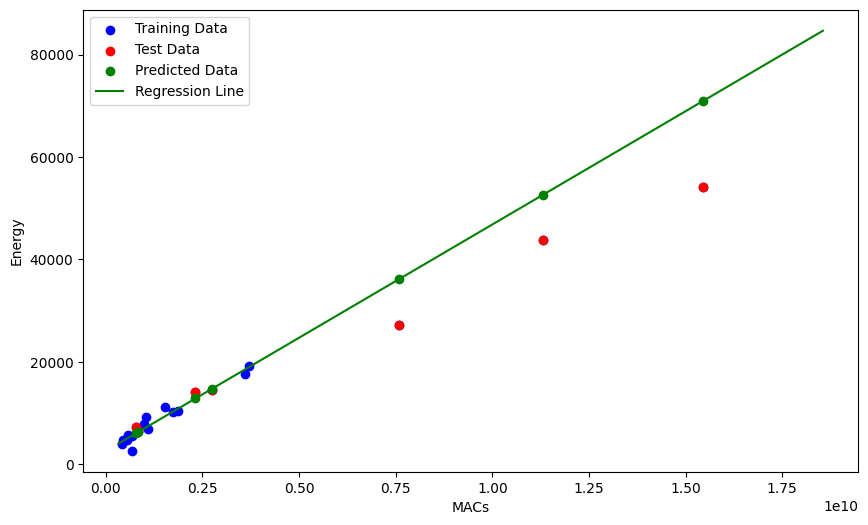

In [15]:
PlotMACs_vs_Energy(fashionmnist_modelinfo, macs_test_f, predict1_f, energy_test_f, model1_f)

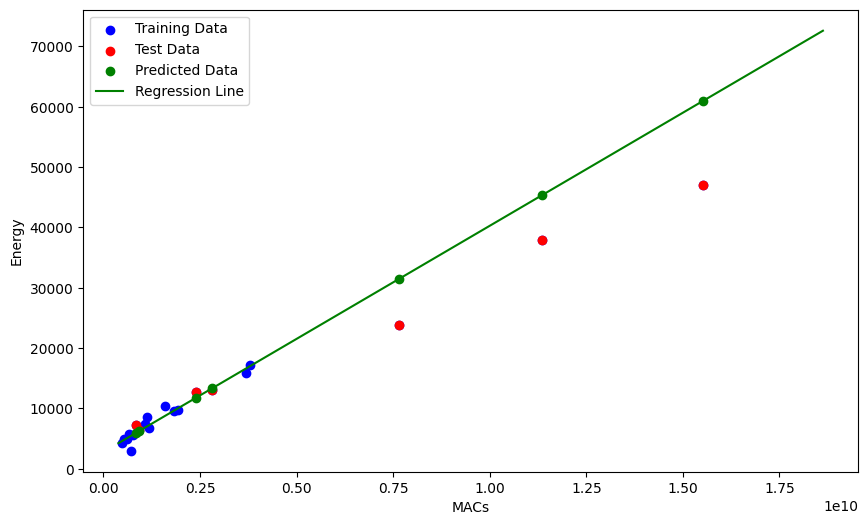

In [16]:
PlotMACs_vs_Energy(cifar100_dataset, 
                    macs_test_c, 
                     predict1_c, 
                  energy_test_c,
                  model1_c)

### Create a new ml model with more input dimension  
the train value include vgg11, let the test value is vgg16 only

In [17]:
# seperate the vgg model data and ResNet_test model data with the original data
test1_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('ResNet_test')]
test2_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('VGG11')]
test3_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('GoogleNet_mod3')]
test4_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('GoogleNet_mod7')]
test5_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('GoogleNet_mod11')]
test6_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('VGG16')]
# concatenate the data
test_f2 = pd.concat([test1_f, test2_f, test3_f, test4_f, test5_f, test6_f])
test_f2

,Model,MACs,Parameters,TotalEnergyPerEpoch,AverageEnergyPerSec,TotalTime,AverageTimeperEpoch,Total Time to Device,Average Time to Device,Total Forward Time,Average Forward Time,Total Backward Time,Average Backward Time,Total Test Time,Average Test Time
6,ResNet_test,2.320000e+09,13870000.0,14077.76,256.90,1087.51,54.38,47.15,2.36,285.08,14.25,595.25,29.76,71.50,3.57
1,VGG11,7.580000e+09,128810000.0,27264.35,324.59,1667.45,83.37,47.60,2.38,477.64,23.88,939.96,47.00,110.53,5.53
11,GoogleNet_mod3,2.740000e+09,11710000.0,14497.42,289.67,993.21,49.66,58.48,2.92,240.75,12.04,524.69,26.23,72.91,3.65
15,GoogleNet_mod7,7.782400e+08,2790000.0,7291.01,260.39,549.10,27.46,48.52,2.43,126.08,6.30,238.34,11.92,52.26,2.61
19,GoogleNet_mod11,8.375600e+08,2100000.0,6546.48,233.81,551.85,27.59,45.21,2.26,123.27,6.16,244.83,12.24,53.48,2.67
3,VGG16,1.546000e+10,134300000.0,54043.96,360.06,2987.17,149.36,47.13,2.36,890.96,44.55,1778.02,88.90,179.09,8.95


In [18]:
# seperate the vgg model data and ResNet_test model data with the original data
test1_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('ResNet_test')]
test2_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('VGG11')]
test3_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('GoogleNet_mod3')]
test4_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('GoogleNet_mod7')]
test5_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('GoogleNet_mod11')]
test6_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('VGG16')]
# concatenate the data
test_c2 = pd.concat([test1_c, test2_c, test3_c, test4_c, test5_c, test6_c])
test_c2

,Model,MACs,Parameters,TotalEnergyPerEpoch,AverageEnergyPerSec,TotalTime,AverageTimeperEpoch,Total Time to Device,Average Time to Device,Total Forward Time,Average Forward Time,Total Backward Time,Average Backward Time,Total Test Time,Average Test Time
6,ResNet_test,2.400000e+09,13920000.0,12656.49,222.06,1132.80,56.64,113.35,5.67,240.22,12.01,504.82,25.24,111.23,5.56
1,VGG11,7.640000e+09,129180000.0,23860.35,294.21,1618.57,80.93,114.94,5.75,398.29,19.91,784.64,39.23,149.39,7.47
11,GoogleNet_mod3,2.820000e+09,11820000.0,13105.00,244.57,1064.14,53.21,130.09,6.50,202.78,10.14,446.12,22.31,112.87,5.64
15,GoogleNet_mod7,8.570100e+08,2900000.0,7203.88,204.42,695.91,34.80,117.14,5.86,108.34,5.42,207.32,10.37,102.62,5.13
19,GoogleNet_mod11,9.162700e+08,2140000.0,6423.14,180.55,704.25,35.21,113.72,5.69,106.51,5.33,213.37,10.67,91.70,4.59
3,VGG16,1.552000e+10,134670000.0,46992.02,340.52,2749.50,137.48,115.99,5.80,741.62,37.08,1505.22,75.26,216.65,10.83


In [19]:
train_f2 = fashionmnist_modelinfo.drop(test_f2.index)
train_c2 = cifar100_dataset.drop(test_c.index)

In [20]:
# find out the MACs of each model
macs_train_f2 = train_f2['MACs'].values.reshape(-1, 1)
macs_test_f2 = test_f2['MACs'].values.reshape(-1, 1)
macs_train_c2 = train_c2['MACs'].values.reshape(-1, 1)
macs_test_c2 = test_c2['MACs'].values.reshape(-1, 1)
# find out the energy of each model
energy_train_f2 = train_f2['TotalEnergyPerEpoch'].values.reshape(-1, 1)
energy_test_f2 = test_f2['TotalEnergyPerEpoch'].values.reshape(-1, 1)
energy_train_c2 = train_c2['TotalEnergyPerEpoch'].values.reshape(-1, 1)
energy_test_c2 = test_c2['TotalEnergyPerEpoch'].values.reshape(-1, 1)

# print(macs_train_f,'\n','*'*50,'\n',macs_test_f)
# print('*'*50)
# print(energy_train_f, '\n','*'*50,'\n', energy_test_f)

In [21]:
model2_f = LinearRegression()
model2_f.fit(macs_train_f2, energy_train_f2)
predict2_f = model2_f.predict(macs_test_f2)
r2_f2 = model2_f.score(macs_test_f2, energy_test_f2)

print(f'The predict values are: {predict2_f}')
print('*'*50)
print(f'The actual values are: {energy_test_f2}')
print('*'*50)
print(f'The R2 score is: {r2_f2}')

The predict values are: [[12025.76401224]
 [31345.65370012]
 [13568.41680101]
 [ 6362.90600365]
 [ 6580.78734515]
 [60288.75840363]]
**************************************************
The actual values are: [[14077.76]
 [27264.35]
 [14497.42]
 [ 7291.01]
 [ 6546.48]
 [54043.96]]
**************************************************
The R2 score is: 0.9619179968826155


In [22]:
model2_c = LinearRegression()
model2_c.fit(macs_train_c2, energy_train_c2)
predict2_c = model2_c.predict(macs_test_c2)
r2_c2 = model2_c.score(macs_test_c2, energy_test_c2)

print(f'The predict values are: {predict2_c}')
print('*'*50)
print(f'The actual values are: {energy_test_c2}')
print('*'*50)
print(f'The R2 score is: {r2_c2}')

The predict values are: [[11775.19972006]
 [31425.33776985]
 [13350.21078512]
 [ 5988.94656941]
 [ 6211.17313063]
 [60975.54537145]]
**************************************************
The actual values are: [[12656.49]
 [23860.35]
 [13105.  ]
 [ 7203.88]
 [ 6423.14]
 [46992.02]]
**************************************************
The R2 score is: 0.7832660135057548


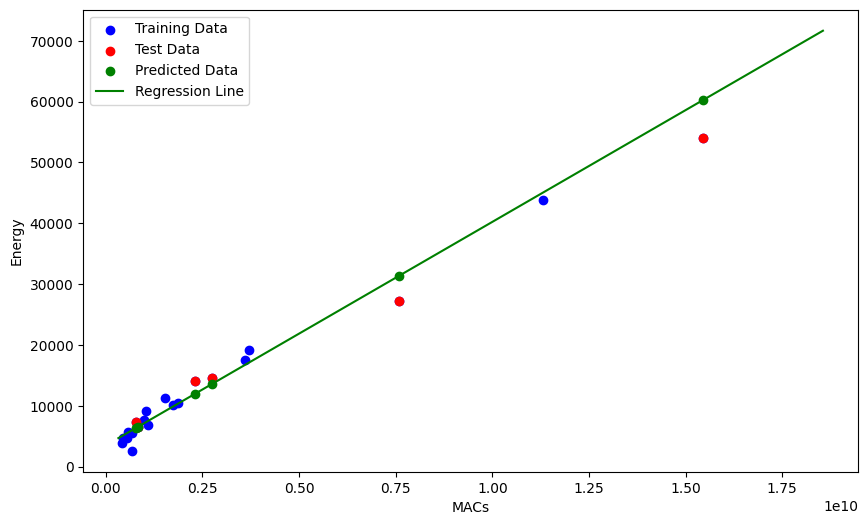

In [23]:
PlotMACs_vs_Energy(fashionmnist_modelinfo, macs_test_f2, predict2_f, energy_test_f2, model2_f)

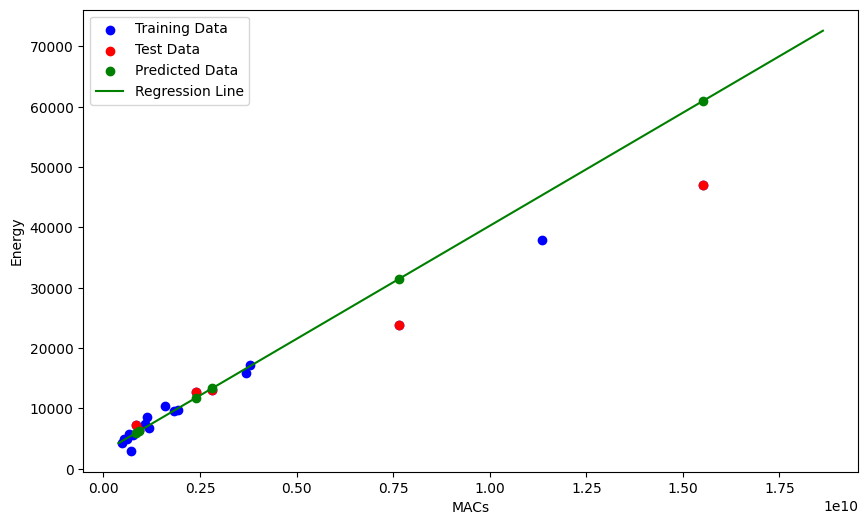

In [24]:
PlotMACs_vs_Energy(cifar100_dataset, macs_test_c2, predict2_c, energy_test_c2, model2_c)

#### try to put all the slope into 1 figure

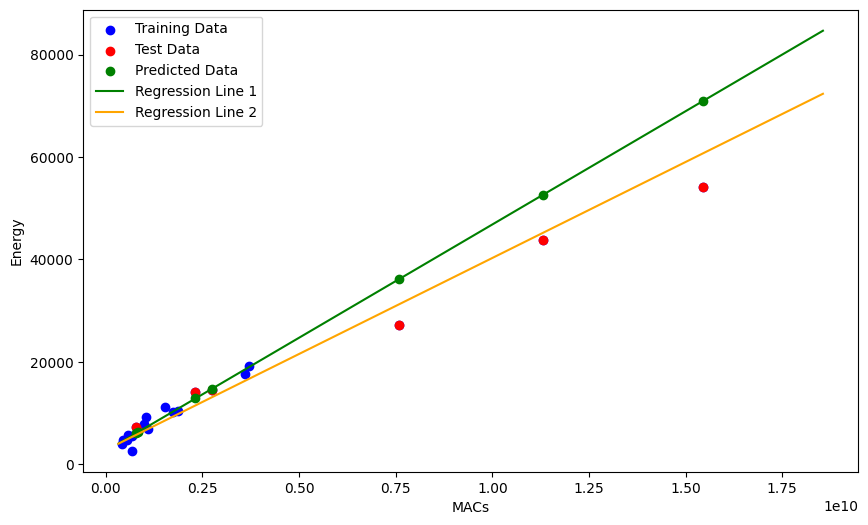

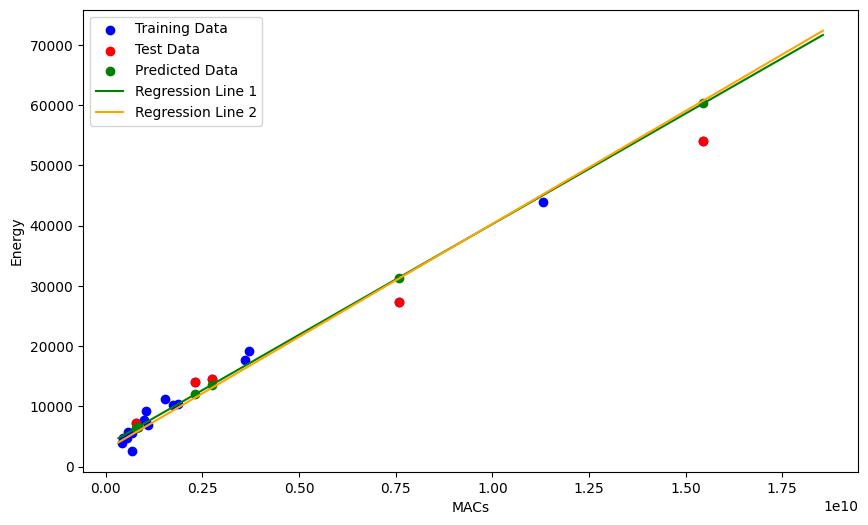

In [26]:
# def a function to plot the 2 models' coefficients and intercepts in the same plot
def plot_coef(df1, df2, macs_test1, energy_test1, energy_pred1, macs_test2, energy_test2, energy_pred2, model1, model2):
    extended_x_min1 = min(df1['MACs'].min(), macs_test1.min()) * 0.8
    extended_x_max1 = max(df1['MACs'].max(), macs_test1.max()) * 1.2
    extended_x1 = np.linspace(extended_x_min1, extended_x_max1, 100)
    plt.figure(figsize=(10, 6))
    plt.scatter(df1['MACs'], df1['TotalEnergyPerEpoch'], color='blue', label='Training Data')
    plt.scatter(macs_test1, energy_test1, color='red', label='Test Data')
    plt.scatter(macs_test1, energy_pred1, color='green', label='Predicted Data')
    model_coef1 = model1.coef_
    model_intercept1 = model1.intercept_
    model_coef2 = model2.coef_
    model_intercept2 = model2.intercept_
    extended_y1 = model_coef1 * extended_x1 + model_intercept1
    extended_y2 = model_coef2 * extended_x1 + model_intercept2
    plt.plot(extended_x1, extended_y1.reshape(-1,1), color='green', label='Regression Line 1')
    plt.plot(extended_x1, extended_y2.reshape(-1,1), color='orange', label='Regression Line 2')
    plt.xlabel('MACs')
    plt.ylabel('Energy')
    plt.legend()
    plt.show()
    
plot_coef(fashionmnist_modelinfo, cifar100_dataset, macs_test_f, energy_test_f, predict1_f, macs_test_c, energy_test_c, predict1_c, model1_f, model1_c)
plot_coef(fashionmnist_modelinfo, cifar100_dataset, macs_test_f2, energy_test_f2, predict2_f, macs_test_c2, energy_test_c2, predict2_c, model2_f, model2_c)